# Logistic Regression for Solving Classification Problems

Logistic regression is a commonly used technique for solving binary classification problems. In a logistic regression model: 

- we take linear combination (or weighted sum of the input features) 
- we apply the sigmoid function to the result to obtain a number between 0 and 1
- this number represents the probability of the input being classified as "Yes"
- instead of RMSE, the cross entropy loss function is used to evaluate the results


Here's a visual summary of how a logistic regression model is structured ([source](http://datahacker.rs/005-pytorch-logistic-regression-in-pytorch/)):


<img src="https://i.imgur.com/YMaMo5D.png" width="480">

The sigmoid function applied to the linear combination of inputs has the following formula:

<img src="https://i.imgur.com/sAVwvZP.png" width="480">


The output of the sigmoid function is called a logistic, hence the name _logistic regression_. For a mathematical discussion of logistic regression, sigmoid activation and cross entropy, check out [this YouTube playlist](https://www.youtube.com/watch?v=-la3q9d7AKQ&list=PLNeKWBMsAzboR8vvhnlanxCNr2V7ITuxy&index=1). Logistic regression can also be applied to multi-class classification problems, with a few modifications.


## Multiclass Classification

By design,  logistic regression models are inherently suited for binary classification tasks, where the target vector (label column) comprises only two classes.

However, extensions to logistic regression exist within libraries such as scikit-learn, enabling its utilization for multiclass classification scenarios, where the target vector has more than two classes..

Common Approaches:

* One-vs-Rest (OvR) multiclass strategy
* Softmax Regression (Multinomial Logistic Regression)


## Multinomial Logistic Regression

Softmax regression (or Multinomial Logistic Regression) is a generalization of logistic regression to the case where we want to handle multiple classes.

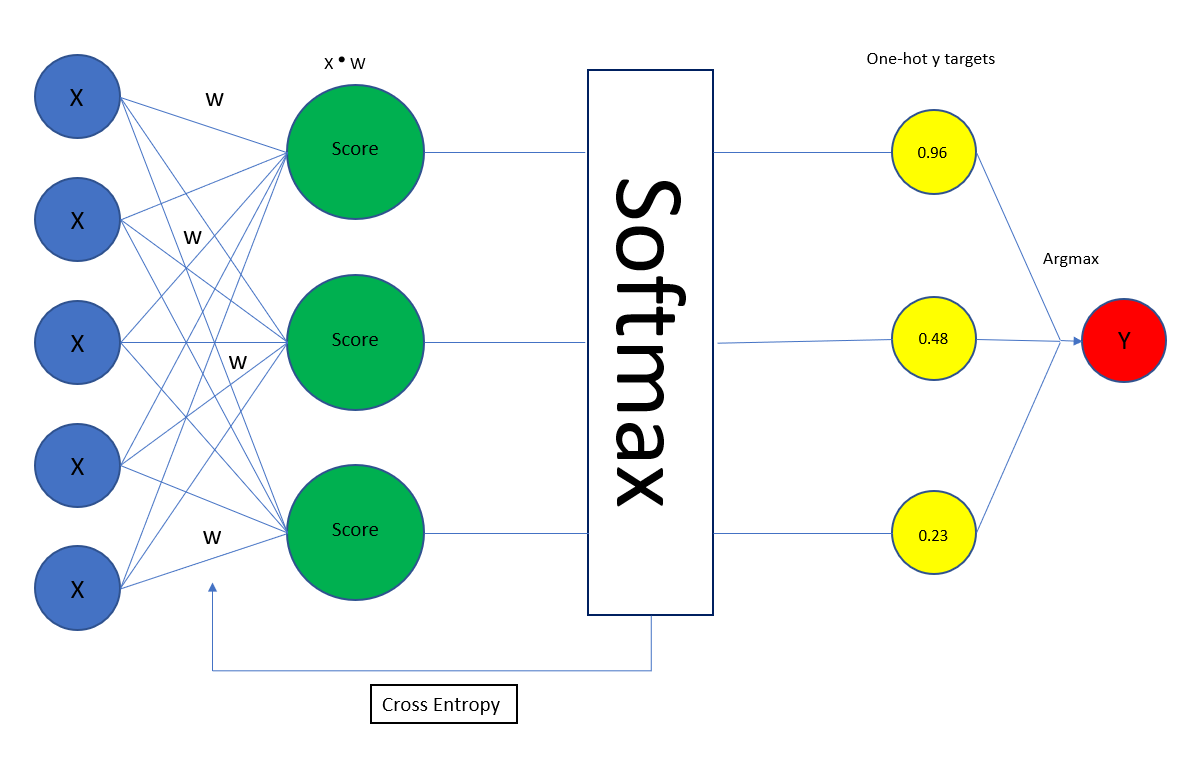


*Let's delve into the practical example to understand this concept better.*

## Data Importing and Understanding

In this implementation I am using Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/t10k-images-idx3-ubyte
/kaggle/input/fashionmnist/fashion-mnist_test.csv
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/train-images-idx3-ubyte


In [2]:
df_train = pd.read_csv("/kaggle/input/fashionmnist/fashion-mnist_train.csv")

df_train.shape

(60000, 785)

In [3]:
df_train.sample(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
39765,0,0,0,0,0,0,4,0,0,0,...,98,89,102,83,0,1,0,0,0,0
15544,2,0,0,0,0,0,0,3,0,0,...,0,0,0,0,153,166,11,0,0,0
13386,6,0,0,0,0,0,0,0,0,0,...,11,0,0,87,149,88,14,0,0,0
17108,6,0,0,0,0,0,0,0,2,1,...,93,74,0,94,154,133,94,0,0,0
53765,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56421,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
14187,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50282,6,0,0,0,0,0,0,0,0,0,...,0,3,0,0,0,0,0,0,0,0
36659,2,0,0,0,0,0,0,0,0,5,...,0,1,0,52,110,16,0,0,0,0
28872,3,0,0,0,0,0,0,0,0,3,...,156,32,0,0,0,0,0,0,0,0


In [18]:
df_test = pd.read_csv("/kaggle/input/fashionmnist/fashion-mnist_test.csv")

df_test.shape

(10000, 785)

### Labels

Each training and test example is assigned to one of the following labels:

Label	Description

0	T-shirt/top

1	Trouser

2	Pullover

3	Dress

4	Coat

5	Sandal

6	Shirt

7	Sneaker

8	Bag

9	Ankle boot

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [5]:
df_train.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


In [7]:
df_train.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

## Plotting the Images of Fashion MNIST

for better Understanding of Dataset

In [8]:
import matplotlib.pyplot as plt

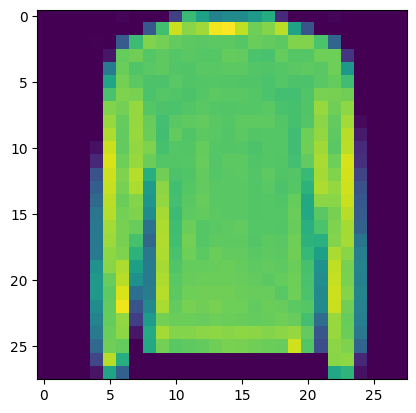

In [11]:
plt.imshow(df_train.iloc[15544, 1:].values.reshape(28,28))

It is clear the that plot is of an **Pullover**.

## Splitting data into Train/Test sets

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# Separate features and labels

train_inputs = df_train.iloc[:60000,1:] # Every Column other than 1st
train_target = df_train.iloc[:60000,0] # Label Column

In [14]:
train_inputs.shape

(60000, 784)

In [15]:
train_target.shape

(60000,)

In [19]:
test_inputs = df_test.iloc[:60000,1:] # Every Column other than 1st
test_target = df_test.iloc[:60000,0] # Label Column

In [20]:
test_target.shape

(10000,)

In [21]:
test_inputs.shape

(10000, 784)

## Model Building on Standard Data

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
lrc = LogisticRegression(multi_class = "multinomial", solver = 'lbfgs', penalty = 'l2', C = 0.01, random_state = 42)

In [24]:
lrc.fit(train_inputs, train_target)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.01, multi_class='multinomial', random_state=42)

In [26]:
y_pred = lrc.predict(test_inputs)

In [27]:
from sklearn.metrics import accuracy_score,confusion_matrix

## Accuracy of Logistic Regression

It's a measure of how often the classifier is correct. It's calculated as the number of correct predictions divided by the total number of predictions.

In [28]:
print(accuracy_score(test_target,y_pred))

0.853


If you are following me, you must know after hyperparameter tuning we are able to slightly increase this accuracy from 0.823 to 0.853.

### When Accuracy Fails?

Accuracy can be misleading when classes are imbalanced. In cases where one class dominates the dataset, a classifier might achieve high accuracy by simply predicting the dominant class for all instances.

## Confusion Matrix

It's a table that describes the performance of a classification model. It presents a summary of the correct and incorrect predictions broken down by each class.

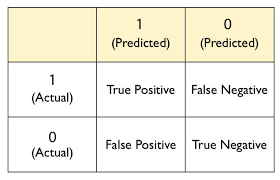

### Why Confusion Matrix?

Confusion matrix provides more insights than accuracy alone. It allows you to see where the model is making errors, such as confusing one class with another.



In [29]:
pd.DataFrame(confusion_matrix(test_target,y_pred))

,0,1,2,3,4,5,6,7,8,9
0,814,7,16,37,8,0,97,0,20,1
1,1,972,4,16,0,2,5,0,0,0
2,20,1,763,11,119,0,74,0,12,0
3,29,25,18,866,35,0,24,0,3,0
4,1,0,77,28,821,1,69,0,3,0
5,2,1,0,1,0,883,1,63,10,39
6,149,5,104,30,108,0,590,0,14,0
7,0,0,0,0,0,28,0,927,1,44
8,2,2,7,2,5,7,21,4,948,2
9,0,0,0,0,0,16,0,35,3,946


## Conclusions

-- **T-shirt/Top (label 0), Pullover (label 2) and Shirt (label 6)** appear to be the most frequently confused classes, indicating similarity in their features. This suggests potential overlap in visual characteristics between these clothing items.

-- **Pullover (label 2) and Coat (label 4)** also show a significant number of misclassifications, implying similarity in their appearance or style.

-- **Sneaker (label 7), Sandal(label 5) and Ankle Boot (label 9)** are occasionally confused, possibly because both are footwear and may share similar characteristics in certain images.  

-- Strangly, **Ankle boot (label 9) and Bags (label 8)** exhibit some confusion, which could be due to their similar shapes or features, especially in certain designs.

-- And **Dress (label 3) and Coat (label 4)** seem to be misclassified occasionally, which could be due to similar shapes or patterns in certain types of dresses and coats.

-- Overall, the confusion matrix suggests that certain pairs of classes have more overlapping features or appearances, leading to higher misclassification rates between them. 

## How to calculate accuracy from confusion matrix?

You can calculate accuracy from a confusion matrix, you sum up the diagonal elements of the confusion matrix (which represent the correctly predicted instances for each class) and divide it by the total number of instances.

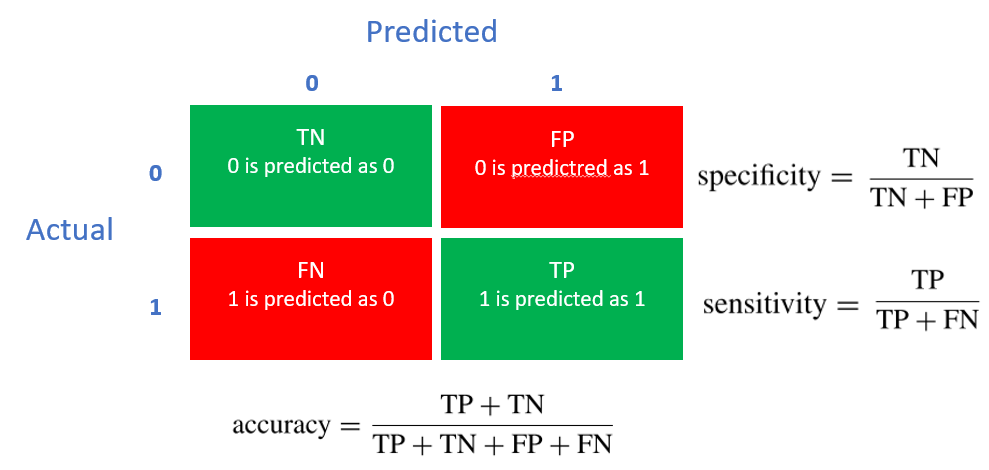

where: 

* **True Positives**: It is the case where we predicted Yes and the real output was also yes.
* **True Negatives**: It is the case where we predicted No and the real output was also No.
* **False Positives**: It is the case where we predicted Yes but it was actually No.
* **False Negatives**: It is the case where we predicted No but it was actually Yes. 

Note: But you cannot calculate Confusion Matrix from Accuracy, because accuracy is just a number.

## Precision

It measures the accuracy of the positive predictions made by the classifier. It's calculated as the number of true positives divided by the sum of true positives and false positives.

## Recall

It measures the ability of the classifier to find all the relevant cases within a dataset. It's calculated as the number of true positives divided by the sum of true positives and false negatives.

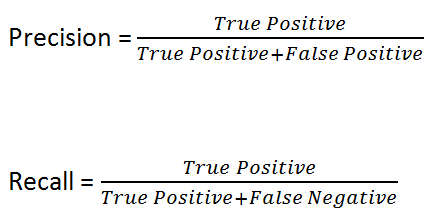
## Why F1 Score? 

F1 score is the harmonic mean of precision and recall. It's useful when you want to find a balance between precision and recall, especially when classes are imbalanced.

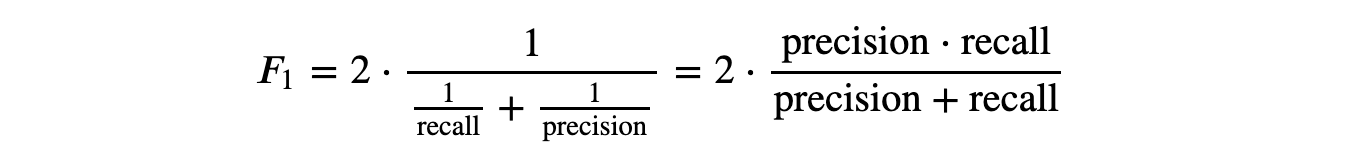

In [30]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [33]:
print("precision_score", precision_score(test_target,y_pred,average='weighted'))
print("recall_score", recall_score(test_target,y_pred,average='weighted'))   
print("f1_score", f1_score(test_target,y_pred,average='weighted'))


precision_score 0.8518087295274654
recall_score 0.853
f1_score 0.8518301569589183


## Classification Report

It's a text summary of various classification metrics such as precision, recall, F1 score, and support (the number of actual occurrences of the class in the specified dataset). It provides a comprehensive evaluation of the model's performance across all classes.

In [34]:
from sklearn.metrics import classification_report

In [35]:
print(classification_report(test_target,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81      1000
           1       0.96      0.97      0.97      1000
           2       0.77      0.76      0.77      1000
           3       0.87      0.87      0.87      1000
           4       0.75      0.82      0.78      1000
           5       0.94      0.88      0.91      1000
           6       0.67      0.59      0.63      1000
           7       0.90      0.93      0.91      1000
           8       0.93      0.95      0.94      1000
           9       0.92      0.95      0.93      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



## Conclusions

* **Precision**: The model achieves high precision across most classes, indicating that when it predicts a certain class, it is usually correct. Classes 1, 5, 7, 8, and 9 have particularly high precision scores, indicating strong predictive performance for these classes.

* **Recall**: The recall scores are generally high, suggesting that the model effectively captures most instances of each class. However, some classes like 6 (Shirt) have relatively lower recall, indicating that the model may miss some instances of these classes.

* **F1-Score**: The F1-score balances precision and recall, providing a harmonic mean of the two metrics. The F1-scores for most classes are reasonably high, indicating overall good performance in terms of both precision and recall.

* **Support**: The support represents the number of samples for each class in the test set. The support values are equal for all classes since the test set contains an equal number of samples for each class (1000 samples per class).

* **Accuracy**: The overall accuracy of the model is 85%, indicating that it correctly predicts the class for 85% of the instances in the test set.

* **Macro Average**: The macro average of precision, recall, and F1-score provides an unweighted mean of these metrics across all classes. In this case, it is also 85%, indicating consistent performance across classes.

* **Weighted Average**: The weighted average of precision, recall, and F1-score provides a weighted mean of these metrics across all classes, weighted by the number of true instances for each class. This reflects the overall performance of the model across all classes, considering class imbalances.

## Let's Run another Model

In [58]:
lrc1 = LogisticRegression(multi_class = "multinomial", solver = 'saga', penalty = 'l1', C = 0.1, random_state = 42)

In [59]:
lrc1.fit(train_inputs, train_target)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=0.1, multi_class='multinomial', penalty='l1',
                   random_state=42, solver='saga')

In [60]:
y_pred1 = lrc1.predict(test_inputs)

In [61]:
print(accuracy_score(test_target,y_pred1))

0.8502


Accuracy has sightly decrease from 0.853 to 0.850.

In [63]:
pd.DataFrame(confusion_matrix(test_target,y_pred1))

,0,1,2,3,4,5,6,7,8,9
0,811,6,19,36,6,1,103,0,18,0
1,1,977,2,12,1,2,5,0,0,0
2,19,6,759,9,114,0,85,0,8,0
3,33,21,16,864,35,0,20,1,10,0
4,1,2,80,30,802,0,81,0,3,1
5,1,4,0,0,0,892,1,62,7,33
6,152,7,100,31,102,0,592,0,16,0
7,0,0,0,0,0,26,0,916,3,55
8,4,2,7,5,6,9,19,5,942,1
9,0,0,0,0,0,12,0,39,2,947


## Conclusions

-- **T-shirt/Top (label 0), Pullover (label 2), Coat(label 4) and Shirt (label 6)** appear to be the most frequently confused classes, indicating similarity in their features. This suggests potential overlap in visual characteristics between these clothing items.

-- **Pullover (label 2) and Coat (label 4)** also show a significant number of misclassifications, implying similarity in their appearance or style.

-- **Sneaker (label 7), Sandal(label 5) and Ankle Boot (label 9)** are occasionally confused, possibly because both are footwear and may share similar characteristics in certain images.  

-- Strangly, **Ankle boot (label 9) and Bags (label 8)** exhibit some confusion, which could be due to their similar shapes or features, especially in certain designs.

-- And **Dress (label 3) and Coat (label 4)** seem to be misclassified occasionally, which could be due to similar shapes or patterns in certain types of dresses and coats.

-- Overall, we get similar pairs have even large amount of overlapping features, leading to higher misclassification rates between them. 

**Note**: I attempted to utilize GridSearchCV for hyperparameter tuning, but due to its complexity, I opted to construct another model incorporating L1 Regularization for dimensionality reduction. However, despite this adjustment, the test accuracy experienced a slight decrease. Consequently, I would highly recommend employing GridSearchCV to identify the optimal parameters for logistic regression in your model.

> Stay tuned for Decision Tree Repo and Don't forget to **Star** this Github Repository for more such contents and consider **sharing with others**.